In [1]:
import pyreadr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path = './data/'

train_normal_path = 'TEP_FaultFree_Training.RData'
train_faulty_path = 'TEP_Faulty_Training.RData'

test_normal_path = 'TEP_FaultFree_Testing.RData'
test_faulty_path = 'TEP_Faulty_Testing.RData'

train_normal_complete = pyreadr.read_r(path + train_normal_path)['fault_free_training']
train_faulty_complete = pyreadr.read_r(path + train_faulty_path)['faulty_training']

test_normal_complete = pyreadr.read_r(path + test_normal_path)['fault_free_testing']
test_faulty_complete = pyreadr.read_r(path + test_faulty_path)['faulty_testing']

In [3]:
xmpl1 = train_normal_complete['xmeas_1'][0:500,]

In [4]:
xmpl1.shape

(500,)

In [5]:
len(xmpl1)

500

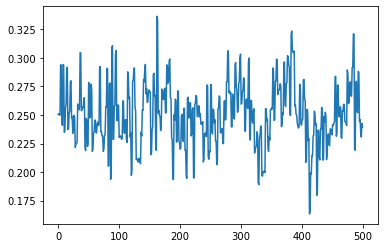

In [6]:
xmpl1.plot()

Text(0.5, 0, 'time')

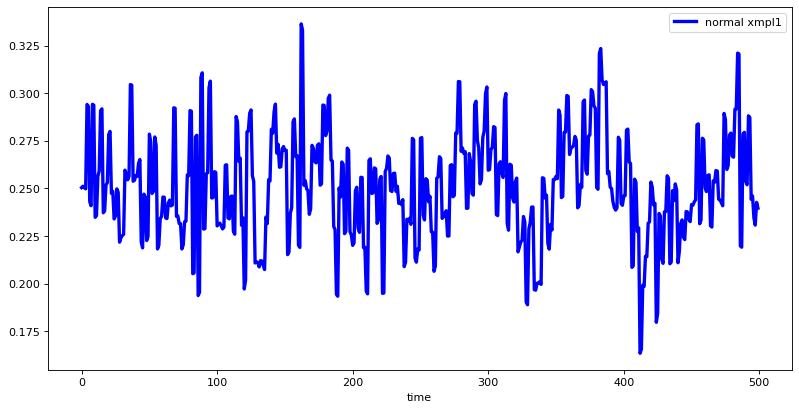

In [7]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(np.arange(500), xmpl1, 'b', lw = 3, label='normal xmpl1')
plt.legend(loc='upper right')
plt.xlabel('time')

In [8]:
type(xmpl1)

pandas.core.series.Series

In [9]:
xmpl1 = xmpl1.to_numpy()

In [10]:
# try reshaping the data

xmpl1 =np.reshape(xmpl1,(-1,1))
# xmpl1 = xmpl1.reshape(-1)

In [11]:
xmpl1.shape

(500, 1)

### Aplied the SFA

mdp [here](https://mdp-toolkit.github.io/node_list.html)

In [12]:
import mdp

timeframes = mdp.nodes.TimeFramesNode(4)

In [13]:
timeframed = timeframes.execute(xmpl1)

In [14]:
type(xmpl1)

numpy.ndarray

In [15]:
xmpl1.shape

(500, 1)

In [16]:
type(timeframed)

numpy.ndarray

In [17]:
timeframed.shape

(497, 4)

In [18]:
# timeframed

In [19]:
cubic_expand = mdp.nodes.PolynomialExpansionNode(3)

In [20]:
cubic_expanded = cubic_expand(timeframed)

In [21]:
sfa = mdp.nodes.SFANode(output_dim=1)

In [22]:
slow = sfa.execute(cubic_expanded)

In [23]:
slow = slow.flatten()

In [24]:
padded_slow = np.concatenate([[slow[0]], slow, [slow[496]], [slow[496]]])

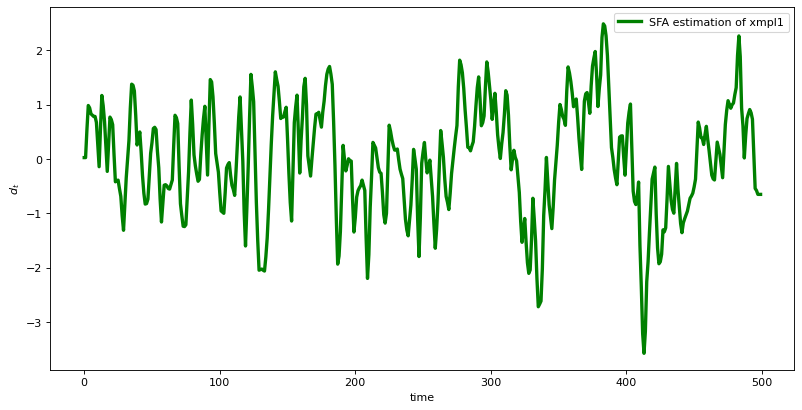

In [25]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(np.arange(500), padded_slow, 'g', lw = 3, label='SFA estimation of xmpl1')
plt.ylabel('$d_t$')
plt.xlabel('time')
plt.legend(loc='upper right')

Text(0.5, 0, 'time')

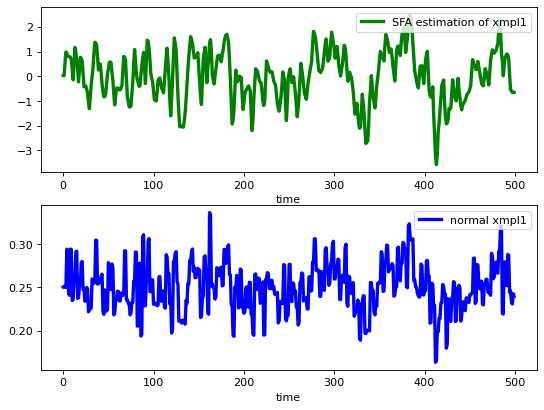

In [26]:
# making comparison plotting

plt.figure(figsize=(8, 6), dpi=80)

plt.subplot(211)
plt.plot(np.arange(500), padded_slow, 'g', lw = 3, label='SFA estimation of xmpl1')
plt.legend(loc='upper right')
plt.xlabel('time')

plt.subplot(212)
plt.plot(np.arange(500), xmpl1, 'b', lw = 3, label='normal xmpl1')
plt.legend(loc='upper right')
plt.xlabel('time')
# plt.ylabel('$d_t$')

In [27]:
### Observation
# the SFA is an supervised learning that can extract the
# smoothest(slowest) features in time series data,
# this can be use for dimensionality reduction, regression
# and classification problem

# we can see from the shape the SFA result are more 
# smoother than the original time series data